In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action = 'ignore')

from IPython.display import Image, display
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image as Img

- 워드클라우드

In [2]:
with open("./data/이상한나라의앨리스.txt", "r", encoding = "utf-8") as f:
    text = f.read()
    print(text)

Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: Alice's Adventures in Wonderland
       Illustrated by Arthur Rackham. With a Proem by Austin Dobson

Author: Lewis Carroll

Illustrator: Arthur Rackham

Release Date: May 19, 2009 [EBook #28885]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***




Produced by Jana Srna, Emmy and the Online Distributed
Proofreading Team at http://www.pgdp.net (This file was
produced from images generously made available by the
University of Florida Digital Collections.)











ALICE'S ADVENTURES IN WONDERLAND

[Illustration: "Alice"]

[Illustration:

          ALICE'S·ADVENTURES
          IN·WONDERLAND
          BY·LEWIS·CAR

{'said': 1.0, 'Alice': 0.7114285714285714, 'said Alice': 0.3314285714285714, 'little': 0.32, 'one': 0.3, 'know': 0.2571428571428571, 'Project Gutenberg': 0.24857142857142858, 'thing': 0.23714285714285716, 'Queen': 0.2342857142857143, 'went': 0.23142857142857143, 'time': 0.2257142857142857, 'see': 0.19714285714285715, 'head': 0.18285714285714286, 'well': 0.18285714285714286, 'King': 0.18285714285714286, 'now': 0.17714285714285713, 'way': 0.17142857142857143, 'Mock Turtle': 0.16857142857142857, 'began': 0.16285714285714287, 'Hatter': 0.16285714285714287, 'Gutenberg tm': 0.16285714285714287, 'Gryphon': 0.15714285714285714, 'say': 0.15428571428571428, 'much': 0.14857142857142858, 'quite': 0.14857142857142858, 'must': 0.14857142857142858, 'first': 0.1457142857142857, 'come': 0.1457142857142857, 'go': 0.1457142857142857, 'never': 0.14, 'thought': 0.14, 'think': 0.13714285714285715, 'voice': 0.13428571428571429, 'looked': 0.13428571428571429, 'work': 0.13142857142857142, 'got': 0.128571428571

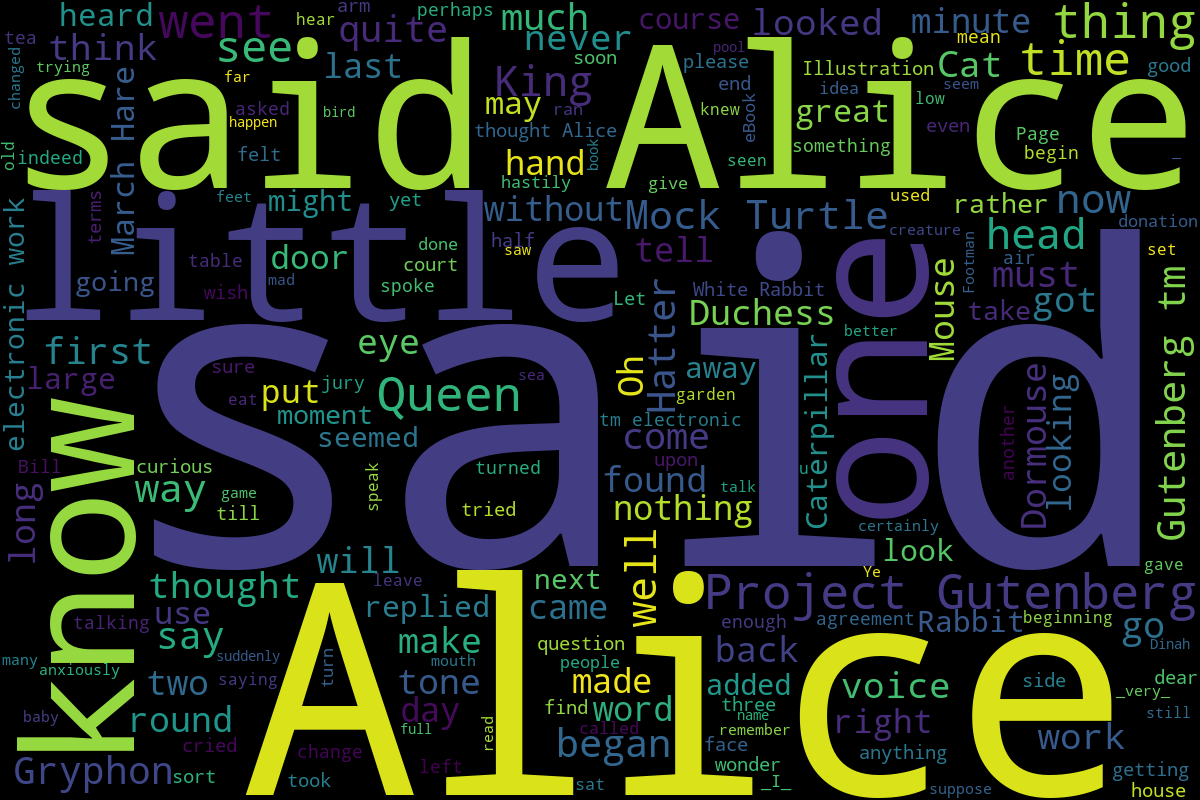

In [3]:
wc = WordCloud(width = 1200, height = 800)

wc.generate(text)

print(wc.words_)

wc.to_file("./data/simple.png")

display(Image(filename = "./data/simple.png"))

- 금지어

In [4]:
ignore = set(STOPWORDS)
ignore.add("said")
ignore.add("Alice")

- 마스크 이미지 설정

In [5]:
img = Img.open("./data/앨리스배경.png")
iarr = np.array(img)
iarr

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

- 워드클라우드

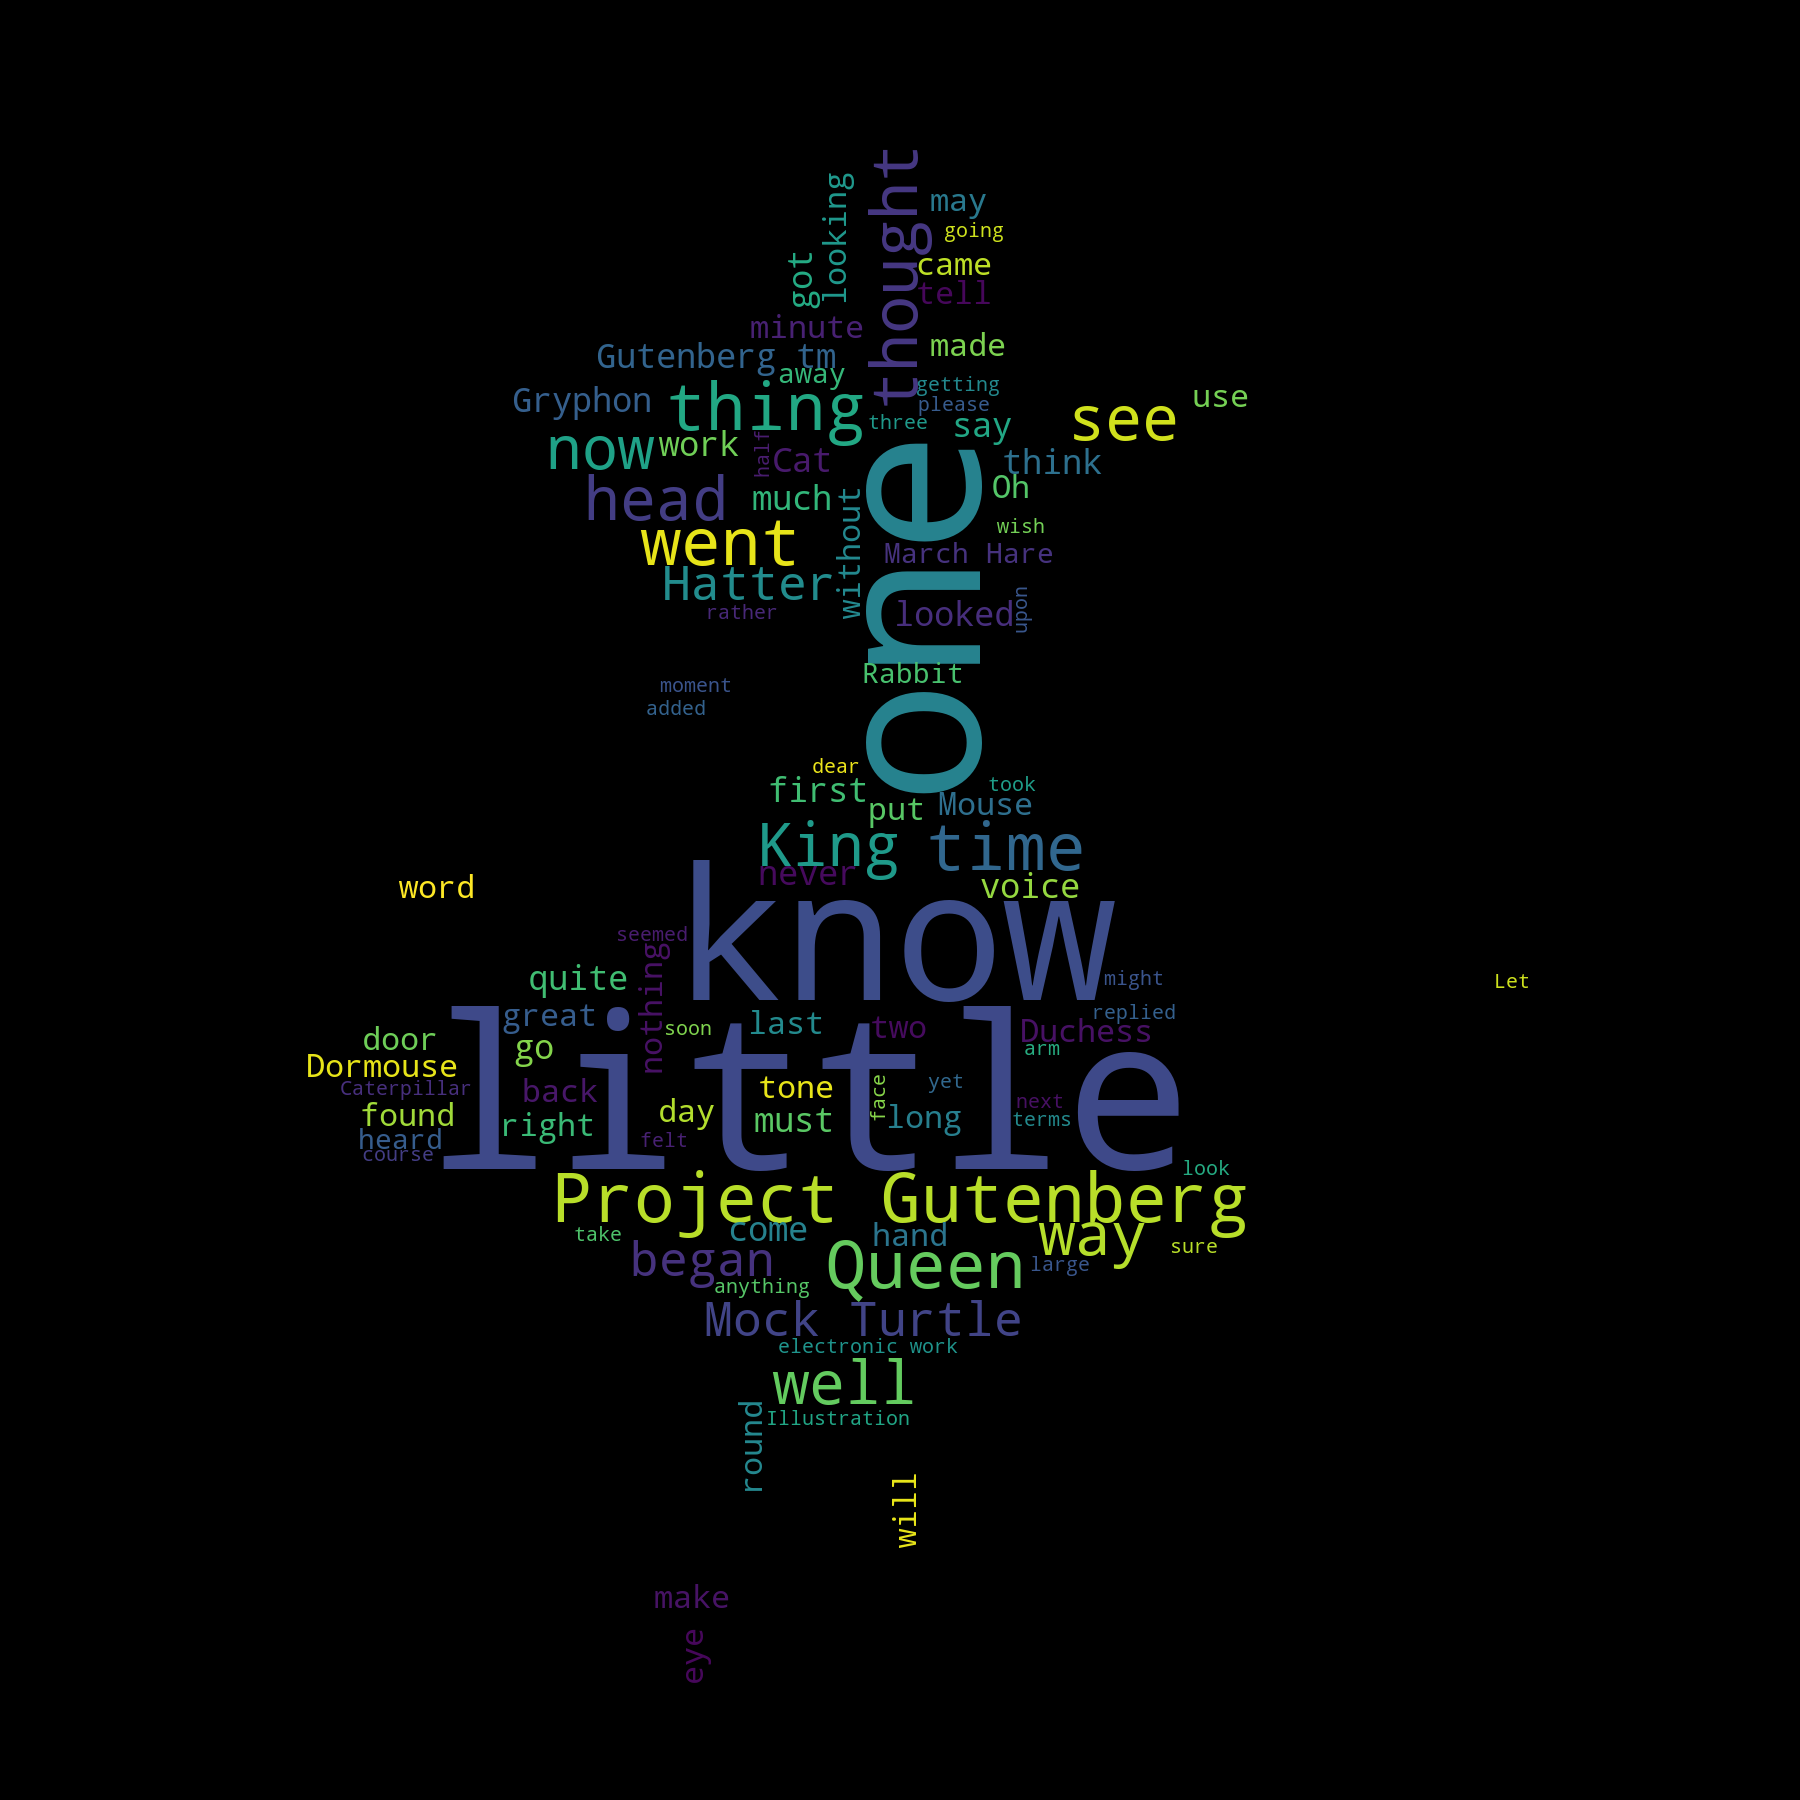

In [6]:
wc = WordCloud(width = 600, height = 1200, max_font_size = 150,
               scale = 2.0, max_words = 100, stopwords = ignore,
               mask = iarr)

wc.generate(text)
wc.to_file("./data/options.png")
display(Image(filename = "./data/options.png"))

- 글자 색상 변경

In [7]:
def get_color(word, font_size, position, orientation, random_state=None, **kwargs):
    # case1) 단일 색상 지정
    #color = "#1550b0"
    #color = "rgb(21, 80, 176)"
    #color = "hsl(217, 30%, 87%)"
    #return color

    # case2) 
    # random_state.seed()                   # 랜덤숫자 카드를 섞는다.
    # r = random_state.randint(0, 255)      # red
    # g = random_state.randint(0, 255)      # green
    # b = random_state.randint(0, 255)      # blue
    # color = "rgb(%d, %d, %d)" % (r, g, b) # rgb(21, 80, 176) 형식으로 색상문자열 생성
    # return color

    # case3) hsl 형식 색상 지정
    # - 색상(H) : 0 ~ 360, 원형의 색상 띠 (`빨주노초파남보`는 대략 51˚씩 차이)
    # - 채도(S) : 0 ~ 100% , 색상의 순도 (빨갛다 ~ 새빨갛다 등)
    # - 명도(L) : 0(어둠,검게 보임) ~ 100(밝음,하얗게 보임)%, 색의 밝기
    random_state.seed()                     # 랜덤숫자 카드를 섞는다.
    a = random_state.randint(30, 90)        # 채도를 랜덤하게 설정
    b = random_state.randint(30, 90)        # 명도를 랜덤하게 설정
    color = "hsl(270, %d%%, %d%%)" % (a, b) # hsl(270, 54% 32%) 형식으로 문자열 생성
    return color

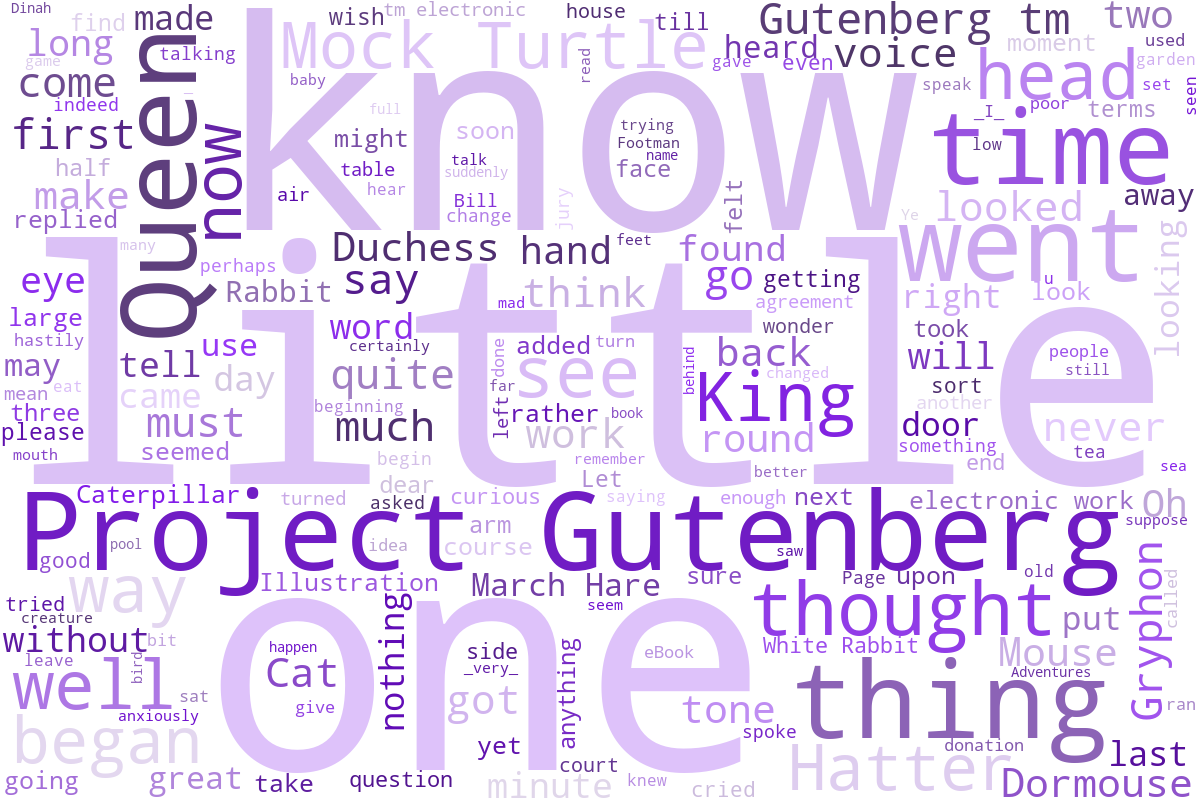

In [8]:
# background_color 파라미터를 통해 배경색상을 설정할 수 있다.
wc = WordCloud(width=1200, height=800, stopwords=ignore, background_color="#ffffff")
wc.generate(text)

# 단어의 색상을 반환할 함수를 연결
# -> 색상값을 리턴해 줄 함수의 이름과 random_state 기능 사용 여부 설정
#    여기서 설정한 random_state에 따라 make_colors 함수 안에서 랜덤값을
#    사용할 수 있을지가 결정된다.
wc.recolor(color_func=get_color, random_state=True)

wc.to_file("./data/colors.png")
display(Image(filename='./data/colors.png'))

- 워드클라우드(한글)
  - 한글은 형태소로 쪼개야 하므로 별도의 전처리가 필요함
  - 다양한 한글 해석 라이브러리가 존재

In [9]:
from konlpy.tag import Okt
from collections import Counter

In [10]:
nlp = Okt()

In [11]:
sample = "그룹 신화 멤버 앤디의 아내 이은주 전 아나운서가 KBS를 상대로 근로자지위를 확인해달라고 낸 소송에서 최종 승소했다. 민사 대법원 판결에서 프리랜서 아나운서가 근로자라고 판단한 건 이번이 처음이다. 아나운서, 작가 등 방송국 소속 프리랜서 직종 종사자들에게 미치는 영향이 클 것이라는 분석이 나온다. 알잘딱깔센"

nouns = nlp.nouns(sample)
print(nouns)

['그룹', '신화', '멤버', '앤디', '아내', '이은주', '전', '아나운서', '를', '상대로', '근로자', '지위', '확인', '소송', '최종', '승소', '민사', '대법원', '판결', '프리랜서', '아나운서', '근로자', '판단', '건', '이번', '처음', '아나운서', '작가', '등', '방송국', '소속', '프리랜서', '직종', '종', '사자', '영향', '것', '분석', '알잘딱깔센']


In [12]:
import konlpy
konlpy.data.path

['C:\\Users\\yjg10/konlpy_data',
 'C:\\konlpy_data',
 'D:\\konlpy_data',
 'E:\\konlpy_data',
 'c:\\Users\\yjg10\\anaconda3\\konlpy_data',
 'c:\\Users\\yjg10\\anaconda3\\lib\\konlpy_data',
 'C:\\Users\\yjg10\\AppData\\Roaming\\konlpy_data',
 'C:\\Users\\yjg10\\anaconda3\\Lib\\site-packages\\konlpy/data']

In [13]:
with open("./data/대한민국헌법.txt", "r", encoding = "utf-8")as f:
    text = f.read()

In [14]:
nlp = Okt()

nouns = nlp.nouns(text)

In [16]:
with open("./data/stopwords-ko.txt", "r", encoding = "utf-8") as f:
    stopwords = f.readlines()

    for i, v in enumerate(stopwords):
        stopwords[i] = v.strip()

In [17]:
data_set = []

for v in nouns:
    if v not in stopwords:
        data_set.append(v)

In [27]:
count = Counter(data_set)

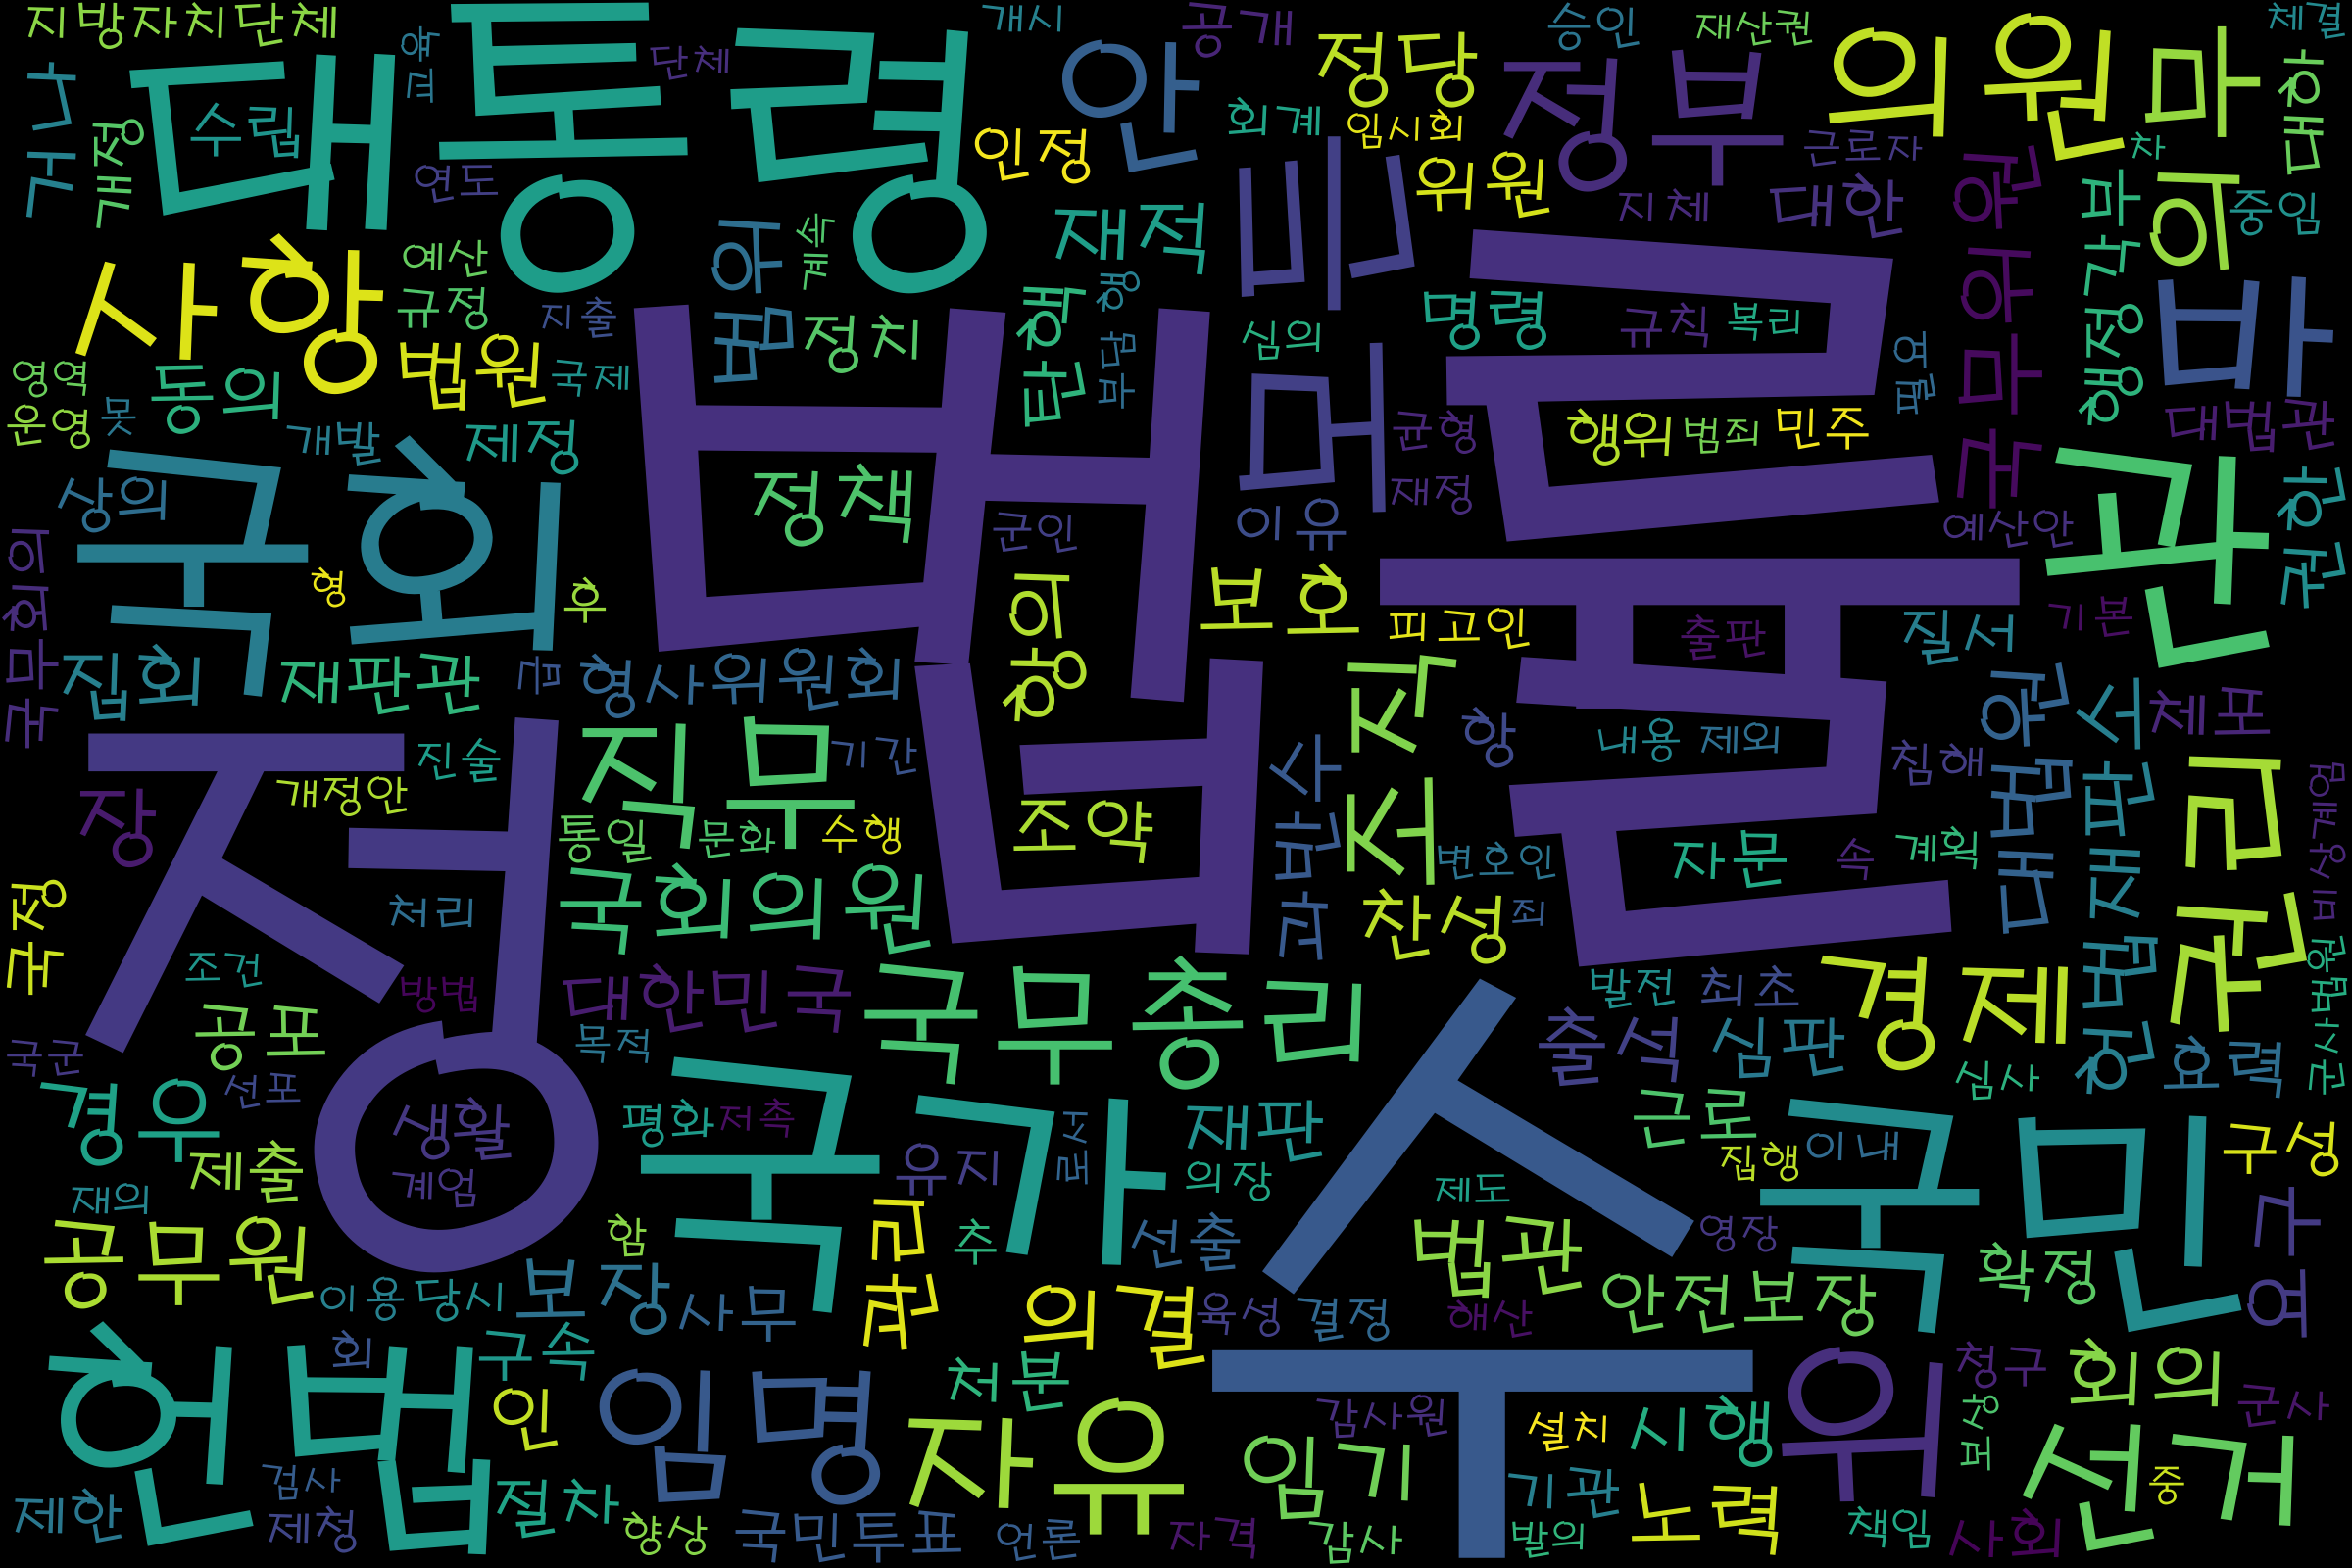

In [35]:
import sys

# 윈도우이거나 Mac이면서 python 버전이 3.11 미만인 경우만 수행
if sys.platform == "win32" or (sys.platform == "darwin" and sys.version_info.minor < 11):
    # 워드 클라우드 객체 생성 -> 한글은 폰트파일의 경로를 지정해야 함
    wc = WordCloud(font_path="H2PORL.TTF", width=1200, height=800, scale=2.0)

    # 직접 생성한 빈도수를 이용해서 워드 클라우드를 그린다.
    wc = wc.generate_from_frequencies(count)
    wc.to_file("./data/대한민국헌법-주요단어.png")
    display(Image(filename='./data/대한민국헌법-주요단어.png'))
else:
    raise Exception("지원되지 않는 환경입니다.")

- 워드클라우드(한글, Mecab)

In [7]:
from IPython.display import Image, display
from konlpy.tag import Mecab
from wordcloud import WordCloud
import sys
import os

# 파이썬 내장 클래스 --> 설치 불필요
from collections import Counter

# 직접 구현한 모듈 참조
# 소스파일의 위치에 따라 `os.path.dirname` 사용 횟수 조절 필요
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

In [2]:
if sys.platform == 'win32':
    mecab = Mecab(dicpath="C:\\mecab\\mecab-ko-dic")
else:
    mecab = Mecab()

In [3]:
sample = "개봉했을때부터 지금까지 마음이답답하거나 힘들때 이영화 보고있어요 그때마다 심적인 위로를 받을수있는영화같아요 장면 하나하나가 너무예쁘고 마음에 남아서 진한 여운까지 주는영화 감사합니다. 알잘딱깔센"

In [4]:
mecab.morphs(sample)

['개봉',
 '했',
 '을',
 '때',
 '부터',
 '지금',
 '까지',
 '마음',
 '이',
 '답답',
 '하',
 '거나',
 '힘들',
 '때',
 '이',
 '영화',
 '보',
 '고',
 '있',
 '어요',
 '그때',
 '마다',
 '심',
 '적',
 '인',
 '위로',
 '를',
 '받',
 '을',
 '수',
 '있',
 '는',
 '영화',
 '같',
 '아요',
 '장면',
 '하나하나',
 '가',
 '너무',
 '예쁘',
 '고',
 '마음',
 '에',
 '남',
 '아서',
 '진한',
 '여운',
 '까지',
 '주',
 '는',
 '영화',
 '감사',
 '합니다',
 '.',
 '알',
 '잘',
 '딱',
 '깔',
 '센']

In [5]:
mecab.pos(sample)

[('개봉', 'NNG'),
 ('했', 'XSV+EP'),
 ('을', 'ETM'),
 ('때', 'NNG'),
 ('부터', 'JX'),
 ('지금', 'NNG'),
 ('까지', 'JX'),
 ('마음', 'NNG'),
 ('이', 'JKS'),
 ('답답', 'XR'),
 ('하', 'XSA'),
 ('거나', 'EC'),
 ('힘들', 'VA+ETM'),
 ('때', 'NNG'),
 ('이', 'MM'),
 ('영화', 'NNG'),
 ('보', 'VV'),
 ('고', 'EC'),
 ('있', 'VX'),
 ('어요', 'EF'),
 ('그때', 'NNG'),
 ('마다', 'JX'),
 ('심', 'NNG'),
 ('적', 'XSN'),
 ('인', 'VCP+ETM'),
 ('위로', 'NNG'),
 ('를', 'JKO'),
 ('받', 'VV'),
 ('을', 'ETM'),
 ('수', 'NNB'),
 ('있', 'VV'),
 ('는', 'ETM'),
 ('영화', 'NNG'),
 ('같', 'VA'),
 ('아요', 'EF'),
 ('장면', 'NNG'),
 ('하나하나', 'NNG'),
 ('가', 'JKS'),
 ('너무', 'MAG'),
 ('예쁘', 'VA'),
 ('고', 'EC'),
 ('마음', 'NNG'),
 ('에', 'JKB'),
 ('남', 'VV'),
 ('아서', 'EC'),
 ('진한', 'VA+ETM'),
 ('여운', 'NNG'),
 ('까지', 'JX'),
 ('주', 'VX'),
 ('는', 'ETM'),
 ('영화', 'NNG'),
 ('감사', 'NNG'),
 ('합니다', 'XSV+EF'),
 ('.', 'SF'),
 ('알', 'NNG'),
 ('잘', 'MAG'),
 ('딱', 'MAG'),
 ('깔', 'VV+ETM'),
 ('센', 'NNG')]

In [6]:
mecab.nouns(sample)

['개봉',
 '때',
 '지금',
 '마음',
 '때',
 '영화',
 '그때',
 '심',
 '위로',
 '수',
 '영화',
 '장면',
 '하나하나',
 '마음',
 '여운',
 '영화',
 '감사',
 '알',
 '센']